In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# path = "C:/Users/ajayc/Desktop/Fractal-Dimension/c1.jpg"
path="c1.jpg"

In [3]:
image = cv2.imread(path, 1)

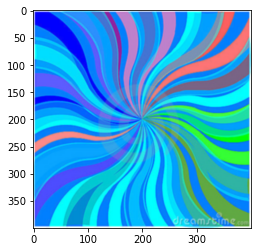

In [19]:
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [4]:
blue_channel = image[:,:,0]
green_channel = image[:,:,1]
red_channel = image[:,:,2]

In [5]:
red = red_channel.flatten()
green = green_channel.flatten()
blue = blue_channel.flatten()

In [6]:
red_max = np.max(red)
green_max = np.max(green)
blue_max = np.max(blue)

In [7]:
M = 256
q = 0.21*float(red_max) + 0.72*float(green_max) + 0.07*float(blue_max)
q = np.ceil(q)
scale = []
lr =[]
l = 2
Nr = []
scale = []

In [8]:
while l <= (M/2):
    r = l
    slice_number = 1
   
    ld = (l*q)/M
    nr = 0
    blocksize_row = r
    blocksize_col = r
    for row in range(1,M, blocksize_row):
        for col in range(1,M, blocksize_col):
            row_1 = row
            row_2 = row_1 + blocksize_row - 1
            col_1 = col
            col_2 = col_1 + blocksize_col - 1
            one_block = image[row_1:row_2, col_1:col_2]
            max_intensity = np.sum(np.max(np.max(one_block)))/3
            min_intensity = np.sum(np.min(np.min(one_block)))/3
           
            height_box = np.ceil(float(max_intensity) / ld)
            if max_intensity == min_intensity:
                nr = nr + 1
            else:
                nr = nr + height_box
            slice_number = slice_number + 1
            
        
    Nr.append(nr)
    scale.append(M/l)
    l = l*2

In [9]:
N = np.log(Nr)
S = np.log(scale)
p = np.polyfit(S, N, 1)
f = np.polyval(p,S)

In [10]:
print("Fractal Dimension is", p[0])

Fractal Dimension is 2.881944568911998


In [11]:
m = p[0]
c = p[1]
y = 0
for j in range(1, len(N)):
    x = (((m * S[j]) + c) - N[j])/(1 + m**2)
    if x < 0:
        y = y + x * (-1)
    else:
        y = y + x
E = (1/len(N))*np.sqrt(y)
print("Error is", E)

Error is 0.0261643845143654
